##Importing Libraries

In [4]:
import pandas as pd  # Data analysis and manipulation library
import numpy as np  # Numerical computing with arrays and matrices
import io  # In-memory file-like object handling(Load the dataset)
import matplotlib.pyplot as plt  # Plotting and visualization library
import seaborn as sns  # Statistical data visualization library
from sklearn.preprocessing import LabelEncoder  # Encode categorical labels into numeric form


##Specifying the File Path

In [5]:
file_name =  "/content/Final_dataset.csv"

##Loading the Dataset

In [6]:
 # Load CSV into DataFrame, parsing specified columns as dates
football = pd.read_csv(file_name, parse_dates=['Date', 'Time', 'Season'])

<ipython-input-6-d03874bf2285>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  football = pd.read_csv(file_name, parse_dates=['Date', 'Time', 'Season'])


##Parsing Dates

In [7]:
 # Convert 'Date' column to datetime with specific format, invalid parsing set to NaT
football['Date'] = pd.to_datetime(football['Date'], format='%d-%m-%Y', errors='coerce')

# Data Cleaning

In [8]:
# Check for  missing values & Calculate the percentage of missing values in each column
missing_values = football.isnull().sum() / len(football)

In [9]:
missing_values

,0
Date,0.000000
Time,0.000000
Round,0.000000
Day,0.000000
Venue,0.000000
Result,0.000000
GF,0.000000
GA,0.000000
Opponent,0.000000
xG,0.300000


<ipython-input-10-2bd7e944d601>:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


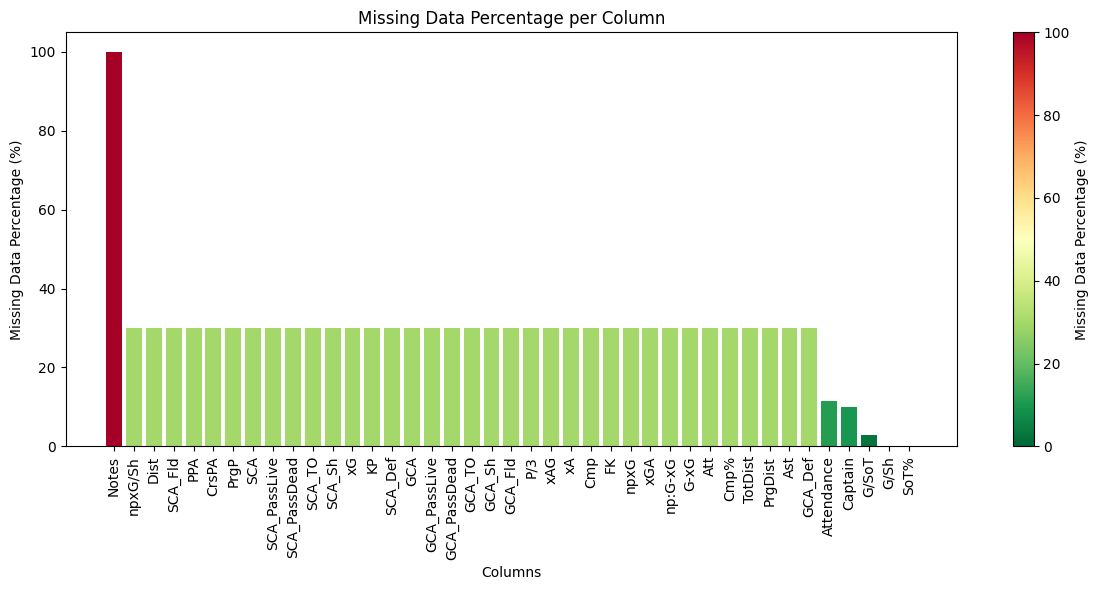

In [10]:
# Calculate missing values and their percentages
missing_values = football.isnull().sum()
missing_percentage = (missing_values / len(football)) * 100

# Filter columns with missing values
missing_data = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# Define colors for the bar plot, with a color map
colors = plt.cm.RdYlGn_r(missing_data.values / 100)

# Create the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(missing_data.index, missing_data.values, color=colors)

# Add color bar
sm = plt.cm.ScalarMappable(cmap="RdYlGn_r", norm=plt.Normalize(0, 100))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Missing Data Percentage (%)')

# Add labels and title
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Missing Data Percentage (%)')
plt.title('Missing Data Percentage per Column')

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
# Drop the 'Notes' column
football = football.drop(columns=['Notes'])

In [12]:
#summary of the DataFrame
football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          7600 non-null   datetime64[ns]
 1   Time          7600 non-null   datetime64[ns]
 2   Round         7600 non-null   object        
 3   Day           7600 non-null   object        
 4   Venue         7600 non-null   object        
 5   Result        7600 non-null   object        
 6   GF            7600 non-null   int64         
 7   GA            7600 non-null   int64         
 8   Opponent      7600 non-null   object        
 9   xG            5320 non-null   float64       
 10  xGA           5320 non-null   float64       
 11  Poss          7600 non-null   int64         
 12  Attendance    6719 non-null   object        
 13  Captain       6840 non-null   object        
 14  Formation     7600 non-null   object        
 15  Referee       7600 non-null   object  

In [13]:
# Access the row at index 7560 in the DataFrame
football.loc[7560]

,7560
Date,2015-05-16 00:00:00
Time,2024-09-17 15:00:00
Round,Matchweek 37
Day,Sat
Venue,Home
Result,D
GF,0
GA,0
Opponent,Stoke City
xG,NaN


In [14]:
missing_values

,0
Date,0
Time,0
Round,0
Day,0
Venue,0
Result,0
GF,0
GA,0
Opponent,0
xG,2280


In [15]:
#Displaying missing values for each column
missing_percentage

,0
Date,0.000000
Time,0.000000
Round,0.000000
Day,0.000000
Venue,0.000000
Result,0.000000
GF,0.000000
GA,0.000000
Opponent,0.000000
xG,30.000000


In [16]:
# Filling the missing numerical values with median, which is robust to outliers
numerical_cols = ['xG', 'xGA', 'Dist', 'FK', 'npxG', 'Cmp', 'Att', 'PrgDist',
                  'Ast', 'xAG', 'xA', 'KP', 'PPA', 'CrsPA', 'PrgP', 'SCA',
                  'SCA_PassLive', 'SCA_PassDead', 'SCA_TO', 'SCA_Sh',
                  'SCA_Fld', 'SCA_Def', 'GCA', 'GCA_PassLive', 'GCA_PassDead',
                  'GCA_TO', 'GCA_Sh', 'GCA_Fld', 'GCA_Def']

# Handle percentage columns separately if applicable
percentage_cols = ['SoT%', 'Cmp%']

# List of non-numerical columns for separate handling or encoding
non_numerical_cols = ['Time', 'Result', 'Poss', 'Formation']

#Numerical columns: These columns will have missing values filled with the median.
#Percentage columns: These may need special handling for missing values since they represent percentages.
#Non-numerical columns: These could be categorical or text-based columns that require different handling,
#such as encoding or mode imputation.

In [17]:
%%capture
# Function to fill nulls with median for each group
def impute_median(group):
    for col in numerical_cols + percentage_cols:
        if col in group:
            group[col].fillna(group[col].median(), inplace=True)
    return group

# Convert percentage columns to numeric if they are not already
for col in percentage_cols:
    football[col] = pd.to_numeric(football[col], errors='coerce')

# Apply the imputation function to each group
football = football.groupby('Team').apply(impute_median)

#The function impute_median fills missing values (NaNs) with the median for numerical and percentage columns, processed per team.
#Before imputation, the percentage columns are converted to numeric data types, handling invalid entries by converting them to NaN.
#Finally, the function is applied to each team in the dataset, ensuring that missing values are imputed on a team-by-team basis rather
#than across the entire dataset. This preserves any unique characteristics that teams might have in the data.

In [18]:
# Reset the DataFrame index, dropping the old index and modifying in place
football.reset_index(drop=True, inplace=True)

## Label Encoding

In [19]:
# Initialize LabelEncoder for non-numeric columns
label_encoders = {col: LabelEncoder().fit(football[col]) for col in non_numerical_cols}

# Apply Label Encoding to non-numeric columns
for col, le in label_encoders.items():
    football[col] = le.transform(football[col])


## only keeping the rows that have data
football = football.dropna()
print(football.shape)

# The code converts categorical columns to numeric labels using LabelEncoder, ensuring the DataFrame is ready for machine learning algorithms
#that require numerical input.

#After encoding, it removes any rows with missing data, ensuring that the DataFrame is free of null values, and then prints the
#resulting shape of the DataFrame.

(4301, 58)


In [20]:
# Display if there are missing values are available or not.
print("no missing values" if football.isnull().sum().sum() == 0 else "We still have missing values")

no missing values


In [21]:
# Fill `Attendance` with median since it's a count-based field
football['Attendance'] = pd.to_numeric(football['Attendance'], errors='coerce')
football['Attendance'].fillna(football['Attendance'].median(), inplace=True)

# Check if all missing values are addressed
missing_values_after_imputation = football.isnull().sum()

print("no missing values" if missing_values_after_imputation.sum() == 0 else "We still have missing values")

no missing values


In [22]:
# only 2 outcomes either Win or Loss (Loss and Win)

football['Result'][football['Result'] == 1] = 0
football['Result'].value_counts()/football.shape[0] *100

<ipython-input-22-6e8f33565100>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  football['Result'][football['Result'] == 1] = 0


,count
Result,
0,60.125552
2,39.874448


In [23]:
# Replace any value that's not 'Win' with 'Loss/draw'
football['Result'] = football['Result'].replace({2: 1, 1: 0})

# Check the distribution of the results
result_distribution = football['Result'].value_counts() / football.shape[0] * 100

# Print the result distribution
print(result_distribution)

#The overall purpose is to convert the Result column into a binary format,
#representing only "Win-1" and "Loss/draw-0," and then display the proportion of each outcome.

Result
0    60.125552
1    39.874448
Name: count, dtype: float64


# feature vector



In [24]:
#Sorting the Football DataFrame by the below variables
football_sorted = football.sort_values(by=['Team', 'Season', 'Date', 'Time'])

#Creating a List of Feature Columns by combining all there list
feature_cols = numerical_cols + percentage_cols + non_numerical_cols

# The code sorts the football dataset by important categorical and time-related fields to ensure a logical order.
# It then consolidates all the relevant feature columns into a single list for easier reference in future operations,
# such as model training or data manipulation.

In [25]:
football_sorted.info() #summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 4301 entries, 228 to 7371
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          4301 non-null   datetime64[ns]
 1   Time          4301 non-null   int64         
 2   Round         4301 non-null   object        
 3   Day           4301 non-null   object        
 4   Venue         4301 non-null   object        
 5   Result        4301 non-null   int64         
 6   GF            4301 non-null   int64         
 7   GA            4301 non-null   int64         
 8   Opponent      4301 non-null   object        
 9   xG            4301 non-null   float64       
 10  xGA           4301 non-null   float64       
 11  Poss          4301 non-null   int64         
 12  Attendance    4301 non-null   float64       
 13  Captain       4301 non-null   object        
 14  Formation     4301 non-null   int64         
 15  Referee       4301 non-null   object     

In [26]:
feature_cols

['xG',
 'xGA',
 'Dist',
 'FK',
 'npxG',
 'Cmp',
 'Att',
 'PrgDist',
 'Ast',
 'xAG',
 'xA',
 'KP',
 'PPA',
 'CrsPA',
 'PrgP',
 'SCA',
 'SCA_PassLive',
 'SCA_PassDead',
 'SCA_TO',
 'SCA_Sh',
 'SCA_Fld',
 'SCA_Def',
 'GCA',
 'GCA_PassLive',
 'GCA_PassDead',
 'GCA_TO',
 'GCA_Sh',
 'GCA_Fld',
 'GCA_Def',
 'SoT%',
 'Cmp%',
 'Time',
 'Result',
 'Poss',
 'Formation']

In [27]:
# Initialize a list for storing feature vectors
feature_vectors = []
targets = []
how_many_matches = 10


# Iterate over each row to get the last 10 matches before the current match
for idx, row in football_sorted.iterrows():
    team = row['Team']
    match_date = row['Date']

    # Filter matches for the current team before the current match date
    previous_matches = football_sorted[(football_sorted['Team'] == team) & (football_sorted['Date'] < match_date)].sort_values(by='Date').tail(how_many_matches)

    # Extract relevant features
    feature_data = previous_matches[feature_cols].values.flatten() if not previous_matches.empty else [None] * len(feature_cols) * how_many_matches

    # Append the feature vector to the list
    feature_vectors.append(feature_data)
    targets.append(row['Result'])

# Convert the list of feature vectors to a DataFrame
feature_vectors_df = pd.DataFrame(feature_vectors)

# The code generates feature vectors for each match by extracting data from the previous 10 matches played by the same team.
# These feature vectors will later be used in machine learning models, with the targets being the match outcomes ("Win" or "Loss")
# that the model aims to predict.
# Missing or insufficient data for a team's prior matches is handled by filling with None values, ensuring consistent vector size.


In [28]:
# Name the columns dynamically
feature_column_names = []
for i in range(1, how_many_matches + 1):
    for col in feature_cols:
        feature_column_names.append(f'{col}_match_{i}')

#Assign New Column Names to the Feature Vectors DataFrame
feature_vectors_df.columns = feature_column_names

# Combine the feature vectors with the original DataFrame
result_df = pd.concat([feature_vectors_df], axis=1)
result_df['Target'] = targets

# Final output:
#result_df: The resulting DataFrame contains all the feature vectors extracted from the last 10 matches for each match,
#along with a Target column that holds the match outcome.

#The feature columns are dynamically named to indicate which match each feature came from.

#This DataFrame is now ready for analysis or use in a machine learning model, where the Target column will act as the label for prediction.

#Purpose:
# This code transforms the previous match data into a structured format that clearly labels each feature by
# match and allows easy concatenation with the target values.

#The final result_df is suitable for training machine learning models, where previous match statistics are used to predict the outcome of future matches.

In [29]:
#Drop Rows with Missing Values:
result_df.dropna(inplace=True)

#Print the Number of Rows:
print("final clean data has:", result_df.shape[0], "rows")
#Print the Number of columns:
print("final clean data has:", result_df.shape[1], "columns")
#Print the Column Names:
print("The column names are:", result_df.columns)

#The number of rows and columns in the final clean dataset after dropping missing values is displayed.
#The column names are printed, showing the structure of the cleaned dataset, which is ready for further analysis or modeling.

final clean data has: 3948 rows
final clean data has: 351 columns
The column names are: Index(['xG_match_1', 'xGA_match_1', 'Dist_match_1', 'FK_match_1',
       'npxG_match_1', 'Cmp_match_1', 'Att_match_1', 'PrgDist_match_1',
       'Ast_match_1', 'xAG_match_1',
       ...
       'GCA_Sh_match_10', 'GCA_Fld_match_10', 'GCA_Def_match_10',
       'SoT%_match_10', 'Cmp%_match_10', 'Time_match_10', 'Result_match_10',
       'Poss_match_10', 'Formation_match_10', 'Target'],
      dtype='object', length=351)


In [30]:
#Create final_feature_cols:
final_feature_cols = [col for col in result_df.columns if col != 'Target']

#Extract Labels:
labels = result_df['Target']

#final_feature_cols: A list of the feature columns (inputs) used for the model, excluding the Target column.
#labels: A series containing the target variable (e.g., "Win" or "Loss") for each row, used as the output labels in a predictive model.

In [31]:
result_df['Target'].value_counts()

#This distribution suggests that there are more "Loss"(0) outcomes than "Win"(1) outcomes in your dataset. You can use this
#information to understand the balance between the two target classes, which could be useful when training a machine learning model
#(especially if the dataset is imbalanced).

,count
Target,
0,2355
1,1593


## Model Training-1

In [32]:
from sklearn.model_selection import train_test_split  # Split dataset into training and test sets
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Scale and normalize feature data
from sklearn.ensemble import RandomForestClassifier  # Tree-based ensemble classifiers
from sklearn.metrics import accuracy_score, classification_report  # Evaluate model performance
from sklearn.svm import SVC  # Support Vector Classifier
from xgboost import XGBClassifier  # XGBoost classifier for high-performance gradient boosting

In [33]:
##X_train, X_test, y_train, y_test = train_test_split(result_df[final_feature_cols], labels, test_size=0.2, random_state=42, stratify=labels)


In [34]:
from sklearn.utils import shuffle

# First, split the dataset into positive and negative samples
X_train_pos, X_discard_pos, y_train_pos, y_discard_pos = train_test_split(result_df[final_feature_cols][labels == 1], labels[labels == 1],
                                                                         test_size=0.001, random_state=42)
X_train_neg, X_discard_neg, y_train_neg, y_discard_neg = train_test_split(result_df[final_feature_cols][labels == 0], labels[labels == 0],
                                                                         test_size=0.3, random_state=42)

# Concatenate the balanced positive and negative samples
X_train_balanced = pd.concat([X_train_pos, X_train_neg])
y_train_balanced = pd.concat([y_train_pos, y_train_neg])

# Shuffle the resulting training set
X_train_balanced, y_train_balanced = shuffle(X_train_balanced, y_train_balanced, random_state=42)

# Split the test set as usual
X_train, X_test, y_train, y_test = train_test_split(X_train_balanced, y_train_balanced, test_size=0.2, random_state=42)

# This code balances the positive and negative samples in the training dataset, ensuring that the model does not become biased
# toward the majority class. The final training and test sets are prepared with equal distribution for training a machine learning model.


In [35]:
# The code shows the following class distribution in our training dataset
y_train.value_counts()

# The training set is well-balanced with almost equal numbers of "Loss" (0) and "Win" (1) outcomes, which is crucial for
# avoiding model bias towards the majority class and achieving better predictive performance across both classes.

,count
Target,
0,1336
1,1255


In [36]:
# Normalize the features

#Initialize the Scaler
scaler = StandardScaler()

#Fit and Transform the Training Data:
X_train_scaled = scaler.fit_transform(X_train)

#Transform the Test Data:
X_test_scaled = scaler.transform(X_test)

#X_train_scaled: The training features are normalized using Z-score normalization.

#X_test_scaled: The test features are scaled using the same parameters learned from the training data.

#This standardization ensures that the features are on the same scale, which helps many machine learning algorithms perform optimally.


In [37]:
## Trying all the models
models = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(),
    'Xgboost':XGBClassifier()
}

results = {}

In [38]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy,
        'report': report
    }

# Print the results
for name, result in results.items():
    print(f'{name} Model')
    print(f'Accuracy: {result["accuracy"]}')
    print(f'Classification Report:\n{result["report"]}')
    print('-' * 80)

# This code systematically trains and evaluates several machine learning models, computes performance metrics, and prints them out
# for easy comparison. This allows you to quickly assess which model performs best on your dataset based on the accuracy
# and other metrics in the classification report.

RandomForest Model
Accuracy: 0.5756172839506173
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.70      0.61       312
           1       0.62      0.46      0.53       336

    accuracy                           0.58       648
   macro avg       0.58      0.58      0.57       648
weighted avg       0.59      0.58      0.57       648

--------------------------------------------------------------------------------
SVC Model
Accuracy: 0.6003086419753086
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.72      0.63       312
           1       0.65      0.49      0.56       336

    accuracy                           0.60       648
   macro avg       0.61      0.60      0.60       648
weighted avg       0.61      0.60      0.60       648

--------------------------------------------------------------------------------
Xgboost Model
Accuracy: 0.5817901234567902
Classifi

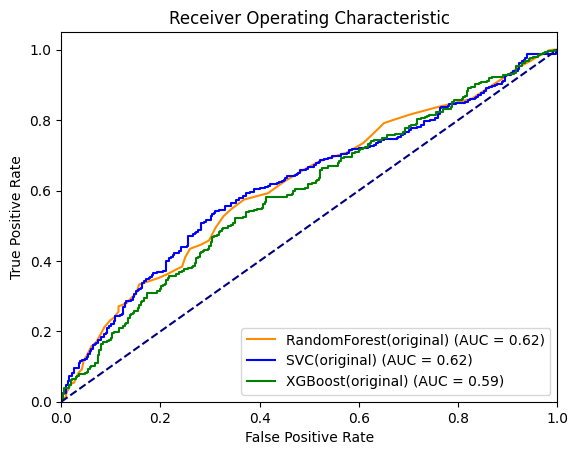

In [39]:
from sklearn.metrics import roc_curve, auc # Import functions to compute ROC curve, AUC
import matplotlib.pyplot as plt  # plotting tools for visualizing ROC

#  X_test_scaled and y_test are your test data and true labels

# Replacing these model names with your actual model objects
random_forest_model = models['RandomForest']
svc_model = models['SVC']
xgboost_model = models['Xgboost']

# Creating the plot for all ROC curves
plt.figure()

# RandomForest ROC
y_proba_randomforest = random_forest_model.predict_proba(X_test_scaled)[:, 1]  # Probability for positive class
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_randomforest)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'RandomForest(original) (AUC = {roc_auc_rf:0.2f})', color='darkorange')

# SVC ROC
if hasattr(svc_model, "predict_proba"):
    y_proba_svc = svc_model.predict_proba(X_test_scaled)[:, 1]
else:
    y_proba_svc = svc_model.decision_function(X_test_scaled)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_proba_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)
plt.plot(fpr_svc, tpr_svc, label=f'SVC(original) (AUC = {roc_auc_svc:0.2f})', color='blue')

# XGBoost ROC
y_proba_xgboost = xgboost_model.predict_proba(X_test_scaled)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgboost)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost(original) (AUC = {roc_auc_xgb:0.2f})', color='green')

# Plot diagonal line for reference (random guessing)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Labels and legend
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Show the plot
plt.show()

#The script compares the performance of three classifiers (RandomForest, SVC, and XGBoost) in terms of ROC curves and their corresponding AUC scores.
#The AUC metric provides a summary of model performance,with higher AUC values indicating better classification performance.
#The ROC curve helps visualize how well the models distinguish between the two classes (positive and negative) across different thresholds.

RandomForest Model:
              precision    recall  f1-score   support

           0       0.65      0.58      0.61       471
           1       0.47      0.55      0.50       319

    accuracy                           0.56       790
   macro avg       0.56      0.56      0.56       790
weighted avg       0.58      0.56      0.57       790

--------------------------------------------------------------------------------
SVC Model:
              precision    recall  f1-score   support

           0       0.64      0.55      0.59       471
           1       0.45      0.54      0.49       319

    accuracy                           0.55       790
   macro avg       0.54      0.55      0.54       790
weighted avg       0.56      0.55      0.55       790

--------------------------------------------------------------------------------
XGBoost Model:
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       471
           1       0.47      

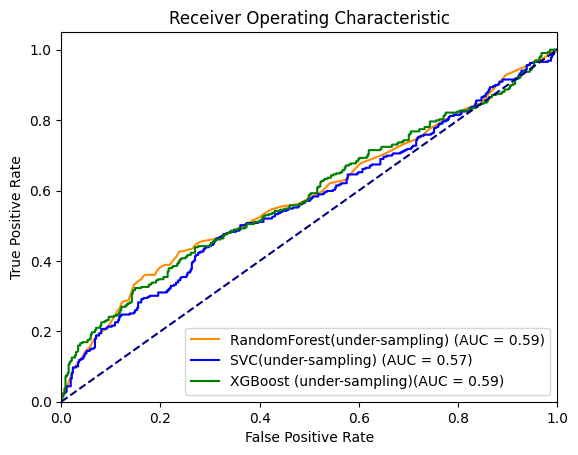

In [40]:
from imblearn.combine import SMOTEENN  # Import SMOTEENN for handling class imbalance (combines oversampling and undersampling)
from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing sets
from sklearn.preprocessing import StandardScaler  # Import scaler to standardize features by removing the mean and scaling to unit variance
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier for building a random forest model
from sklearn.svm import SVC  # Import SVC for building a Support Vector Classifier model
from xgboost import XGBClassifier  # Import XGBClassifier for building an XGBoost model
from sklearn.metrics import roc_curve, auc, classification_report  # Import functions to compute ROC curve, AUC, and classification report
import matplotlib.pyplot as plt  # Import matplotlib for plotting graphs (ROC curve)

# Assuming 'result_df' contains the final dataset with features and target

# Define X (features) and y (target)
X = result_df[final_feature_cols]  # final_feature_cols already defined in the notebook
y = result_df['Target']            # Labels for Win (1) or Loss (0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTEENN (SMOTE + under-sampling)
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Optional: Scale the data (important for SVC and XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Train the models and get predicted probabilities for ROC

# 1. RandomForest Model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train_resampled)
y_proba_rf = random_forest.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1 (win)
y_pred_rf = random_forest.predict(X_test_scaled)
print("RandomForest Model:")
print(classification_report(y_test, y_pred_rf))
print('-' * 80)

# 2. SVC Model
svc_model = SVC(random_state=42, probability=True)  # Set probability=True to get predicted probabilities
svc_model.fit(X_train_scaled, y_train_resampled)
y_proba_svc = svc_model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1 (win)
y_pred_svc = svc_model.predict(X_test_scaled)
print("SVC Model:")
print(classification_report(y_test, y_pred_svc))
print('-' * 80)

# 3. XGBoost Model
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train_scaled, y_train_resampled)
y_proba_xgb = xgboost_model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1 (win)
y_pred_xgb = xgboost_model.predict(X_test_scaled)
print("XGBoost Model:")
print(classification_report(y_test, y_pred_xgb))
print('-' * 80)

# Plot ROC Curves for all models on a single plot
plt.figure()

# RandomForest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'RandomForest(under-sampling) (AUC = {roc_auc_rf:0.2f})', color='darkorange')

# SVC ROC
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_proba_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)
plt.plot(fpr_svc, tpr_svc, label=f'SVC(under-sampling) (AUC = {roc_auc_svc:0.2f})', color='blue')

# XGBoost ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (under-sampling)(AUC = {roc_auc_xgb:0.2f})', color='green')

# Plot diagonal line for reference (random guessing)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Labels and legend
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Show the plot
plt.show()

#It trains three machine learning models (RandomForest, SVC, and XGBoost) to predict the outcome of football matches (win/loss).
#It applies SMOTEENN (a combination of SMOTE for oversampling and ENN for undersampling) to handle class imbalance.
#It scales the feature set to prepare it for models like SVC and XGBoost.
#It evaluates the models using classification metrics (like precision, recall, F1-score) and plots the ROC curves for comparison.

#ROC curves help in visually comparing the models' ability to distinguish between positive and negative classes across different threshold values.
#The AUC score provides a single number that summarizes the performance (higher AUC values indicate better model performance).

RandomForest Model:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       471
           1       0.55      0.42      0.48       319

    accuracy                           0.63       790
   macro avg       0.61      0.60      0.60       790
weighted avg       0.62      0.63      0.62       790

--------------------------------------------------------------------------------
SVC Model:
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       471
           1       0.54      0.40      0.46       319

    accuracy                           0.62       790
   macro avg       0.60      0.58      0.58       790
weighted avg       0.61      0.62      0.61       790

--------------------------------------------------------------------------------
XGBoost Model:
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       471
           1       0.52      

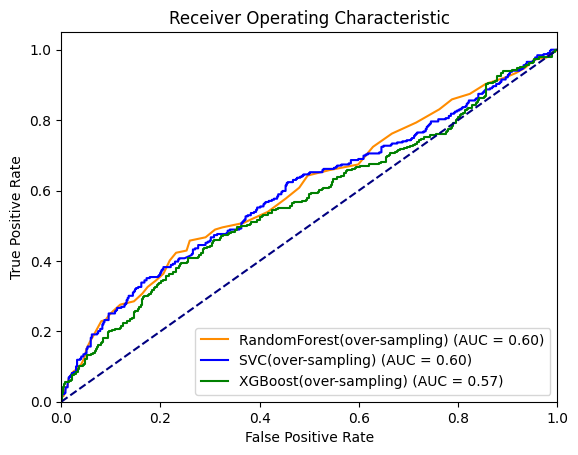

In [41]:
from imblearn.over_sampling import SMOTE  # Import SMOTE for handling class imbalance by oversampling the minority class
from sklearn.model_selection import train_test_split  # Import function to split the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler  # Import StandardScaler to standardize features by scaling them to unit variance
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier for building a random forest model
from sklearn.svm import SVC  # Import SVC for building a Support Vector Classifier model
from xgboost import XGBClassifier  # Import XGBClassifier for building an XGBoost model
from sklearn.metrics import classification_report, roc_curve, auc  # Import metrics for classification report, ROC curve, and AUC
import matplotlib.pyplot as plt  # Import matplotlib to create plots (ROC curve)

# Assuming 'result_df' contains the final dataset with features and target

# Define X (features) and y (target)
X = result_df[final_feature_cols]  # final_feature_cols already defined in the notebook
y = result_df['Target']            # Labels for Win (1) or Loss (0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Optional: Scale the data (scaling is important for SVC and XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Train the models and get predicted probabilities for ROC

# 1. RandomForest Model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train_resampled)
y_proba_rf = random_forest.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1 (win)
y_pred_rf = random_forest.predict(X_test_scaled)
print("RandomForest Model:")
print(classification_report(y_test, y_pred_rf))
print('-' * 80)

# 2. SVC Model
svc_model = SVC(random_state=42, probability=True)  # Set probability=True to get predicted probabilities
svc_model.fit(X_train_scaled, y_train_resampled)
y_proba_svc = svc_model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1 (win)
y_pred_svc = svc_model.predict(X_test_scaled)
print("SVC Model:")
print(classification_report(y_test, y_pred_svc))
print('-' * 80)

# 3. XGBoost Model
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train_scaled, y_train_resampled)
y_proba_xgb = xgboost_model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1 (win)
y_pred_xgb = xgboost_model.predict(X_test_scaled)
print("XGBoost Model:")
print(classification_report(y_test, y_pred_xgb))
print('-' * 80)

# Plot ROC Curves for all models on a single plot
plt.figure()

# RandomForest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'RandomForest(over-sampling) (AUC = {roc_auc_rf:0.2f})', color='darkorange')

# SVC ROC
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_proba_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)
plt.plot(fpr_svc, tpr_svc, label=f'SVC(over-sampling) (AUC = {roc_auc_svc:0.2f})', color='blue')

# XGBoost ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost(over-sampling) (AUC = {roc_auc_xgb:0.2f})', color='green')

# Plot diagonal line for reference (random guessing)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Labels and legend
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Show the plot
plt.show()


# This Python script trains three machine learning models (RandomForest, SVC, and XGBoost) to predict football match outcomes (win/loss) using imbalanced data.
# It addresses class imbalance with SMOTE (oversampling the minority class), scales the features for optimal model performance, and evaluates the models using classification metrics such as
# precision, recall, and F1-score. Additionally, it generates and plots ROC curves for all three models on a single graph to compare their ability to distinguish between winning and losing outcomes,
# with the AUC score summarizing each model's performance.


## Creating another feature vector



In [42]:
#Sorting the Football DataFrame:
football_sorted = football.sort_values(by=['Team', 'Season', 'Date', 'Time'])

#Defining Feature Columns
feature_cols = numerical_cols + percentage_cols


In [43]:
#Extract Unique Seasons
def extract_last_10_features(team_data, how_many = 20):
    seasons = team_data['Season'].unique()
    feature_data = []  #Initialize a List for Storing Feature Data:

    for i in range(1, len(seasons)):     # Iterate Through Each Season:
        current_season = seasons[i]      # Get Data for Current and Past Seasons:
        past_season_data = team_data[team_data['Season'] < current_season].sort_values(by='Date', ascending=False).head(how_many)

        if len(past_season_data) == how_many:  # Ensure we have 20 rows
            flattened_row = {'Team': past_season_data['Team'].iloc[0], 'Season': current_season}
            for j in range(how_many):
                for col in feature_cols:
                    flattened_row[f'{col}_past_{j+1}'] = past_season_data[col].iloc[j]

            # flattened_row['Target'] = 1 if team_data[team_data['Season'] == current_season]['GF'].isin(range(4, 6)).any() else 0
            feature_data.append(flattened_row)

    return pd.DataFrame(feature_data)


# The function processes historical data to extract features for each team up to a specific season. It ensures that each season's
# data includes exactly how_many recent rows, formats these rows into a dictionary of features, and compiles these dictionaries
# into a DataFrame for analysis or modeling purposes.

In [44]:
feature_df = football_sorted.groupby('Team').apply(extract_last_10_features).reset_index(drop=True)

# This line of code applies the extract_last_10_features function to each team’s data, consolidates the results into a single DataFrame,
# and resets the index. This is useful for preparing data for analysis or modeling where historical features are required for each team.

In [45]:
feature_df

,Team,Season,xG_past_1,xGA_past_1,Dist_past_1,FK_past_1,npxG_past_1,Cmp_past_1,Att_past_1,PrgDist_past_1,...,SCA_Def_past_20,GCA_past_20,GCA_PassLive_past_20,GCA_PassDead_past_20,GCA_TO_past_20,GCA_Sh_past_20,GCA_Fld_past_20,GCA_Def_past_20,SoT%_past_20,Cmp%_past_20
0,Arsenal,2019-01-01,0.8,1.1,19.4,0.0,0.8,656.0,750.0,3183.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,44.4,79.9
1,Arsenal,2020-01-01,1.4,2.0,18.0,0.0,1.4,555.0,653.0,2875.0,...,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,35.3,83.0
2,Arsenal,2021-01-01,1.6,1.4,17.6,0.0,1.6,501.0,634.0,3063.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,82.7
3,Arsenal,2022-01-01,2.5,0.1,17.7,1.0,1.7,516.0,621.0,3077.0,...,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,50.0,83.3
4,Arsenal,2023-01-01,3.1,0.4,14.2,0.0,3.1,437.0,555.0,2250.0,...,0.0,7.0,3.0,2.0,0.0,2.0,0.0,0.0,32.0,87.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Wolves,2020-01-01,2.6,1.5,18.5,1.0,2.6,538.0,626.0,2659.0,...,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,31.6,73.6
106,Wolves,2021-01-01,0.4,1.2,18.5,1.0,0.4,352.0,439.0,2050.0,...,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,33.3,77.3
107,Wolves,2022-01-01,0.7,0.8,20.4,1.0,0.7,404.0,509.0,2540.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.3,81.3
108,Wolves,2023-01-01,0.9,1.1,20.0,0.0,0.9,489.0,592.0,2547.0,...,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.4,79.8


In [46]:
feature_df['Team'].unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Brighton & Hove Albion', 'Burnley', 'Chelsea', 'Crystal Palace',
       'Everton', 'Fulham', 'Huddersfield Town', 'Leeds United',
       'Leicester City', 'Liverpool', 'Manchester City',
       'Manchester United', 'Newcastle United', 'Nottingham Forest',
       'Sheffield United', 'Southampton', 'Tottenham Spurs', 'Watford',
       'West Ham', 'West Ham United', 'Wolves'], dtype=object)

In [47]:
winning_teams = {
'Manchester City':	[2024, 2023, 2022, 2021,2020,2019,2018,2017,2016,2015],
'Manchester United' :	[2023, 2021, 2020, 2018, 2015],
'Arsenal':	[2024, 2023, 2015, 2016],
'Liverpool':	[2024, 2022, 2021, 2020, 2019,2018],
'Tottenham Spurs' :	[2024, 2022, 2019, 2018,2017,2016],
'Chelsea' :	[2022, 2021, 2020, 2019, 2017,2015],
'Aston Villa' :	[2024],
'Newcastle United' : [2023],
'Leicester City' :	[2016]
}

In [48]:
# Convert each year to a Timestamp object
for team in winning_teams:
    winning_teams[team] = [pd.Timestamp(str(year) + '-01-01') for year in winning_teams[team]]

In [49]:
#Initialize the labels List:
labels = []
for idx, rows in feature_df.iterrows():        # Iterate Through Rows of feature_df:
  if rows['Team'] in winning_teams.keys():     # Check if the Team is in winning_teams:
    if rows['Season'] in winning_teams[rows['Team']]:  # Check if the Season is a Winning Season:
      labels.append(1)                                  # Append Labels:
    else:
      labels.append(0)
  else:
    labels.append(0)

# The purpose of this code is to generate a list of labels where each label indicates whether the specific team and season combination in feature_df corresponds to a winning season according to winning_teams. Here’s how it works in practice:

# Successful Matches: Rows where the team and season both match a winning team and season are labeled with 1.
# Unsuccessful Matches: All other rows are labeled with 0.


In [50]:
final_features = [name for name in feature_df.columns if name not in ['Team', 'Season']]

# Purpose: This code filters out non-feature columns from a DataFrame and creates a list of only the feature columns.
# Use Case: This is useful when preparing data for machine learning models where you need to select only the relevant feature
# columns while excluding identifiers or target variables.
#This approach ensures that you focus only on the columns that contain the actual data used for modeling, rather than metadata or identifiers.

In [51]:
# Dimension of dataframe
feature_df.shape

(110, 622)

In [52]:
from sklearn.model_selection import train_test_split  #Splits data into training and testing sets.
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Normalize or standardize feature data
from sklearn.ensemble import RandomForestClassifier  #Uses an ensemble of decision trees for classification.
from xgboost import XGBClassifier #
from sklearn.linear_model import LogisticRegression   #Classifies data into binary or multiple categories.
from sklearn.metrics import accuracy_score, classification_report #Evaluate the performance of classification models.

# Model training-2

In [53]:
X_train, X_test, y_train, y_test = train_test_split(feature_df, labels, test_size=0.2, random_state=42, stratify=labels)

# This code snippet effectively splits your dataset into training and testing subsets while maintaining the proportion of class labels
# in both subsets. This helps in training and evaluating models in a consistent and reproducible manner, ensuring that the test set is a
# representative sample of the entire dataset

In [54]:
# Normalize the features

#Initialize the Scaler
scaler = StandardScaler()

#Fit and Transform the Training Data:
X_train_scaled = scaler.fit_transform(X_train[final_features])

#Transform the Test Data:
X_test_scaled = scaler.transform(X_test[final_features])

#X_train_scaled: The training features are normalized using Z-score normalization.

#X_test_scaled: The test features are scaled using the same parameters learned from the training data.

#This standardization ensures that the features are on the same scale, which helps many machine learning algorithms perform optimally.

In [55]:
X_train

,Team,Season,xG_past_1,xGA_past_1,Dist_past_1,FK_past_1,npxG_past_1,Cmp_past_1,Att_past_1,PrgDist_past_1,...,SCA_Def_past_20,GCA_past_20,GCA_PassLive_past_20,GCA_PassDead_past_20,GCA_TO_past_20,GCA_Sh_past_20,GCA_Fld_past_20,GCA_Def_past_20,SoT%_past_20,Cmp%_past_20
43,Everton,2023-01-01,1.4,1.2,16.0,0.0,1.4,309.0,443.0,2341.0,...,0.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,44.4,63.4
35,Crystal Palace,2021-01-01,1.6,0.9,16.0,2.0,1.6,304.0,390.0,2384.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.6,72.6
40,Everton,2020-01-01,1.4,0.3,19.2,1.0,1.4,467.0,591.0,2985.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,80.8
68,Manchester City,2023-01-01,2.3,0.8,16.3,1.0,2.3,540.0,629.0,2433.0,...,3.0,5.0,4.0,0.0,1.0,0.0,0.0,0.0,20.8,84.8
102,West Ham United,2019-01-01,1.2,1.2,17.9,0.0,1.2,408.0,541.0,2603.0,...,0.0,6.0,4.0,1.0,1.0,0.0,0.0,0.0,26.7,80.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,Leicester City,2020-01-01,1.1,3.3,14.1,0.0,1.1,353.0,443.0,2028.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.6,79.8
72,Manchester United,2021-01-01,1.7,2.0,19.3,0.0,1.7,569.0,667.0,3030.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.7,75.4
5,Arsenal,2024-01-01,1.6,1.2,15.4,1.0,1.6,576.0,670.0,2696.0,...,0.0,4.0,3.0,0.0,1.0,0.0,0.0,0.0,46.7,88.7
13,Bournemouth,2023-01-01,0.6,1.4,18.1,0.0,0.6,361.0,478.0,1886.0,...,0.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,55.6,68.1


<Axes: ylabel='Frequency'>

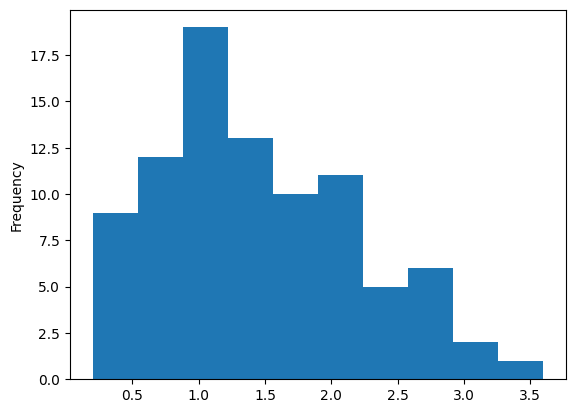

In [56]:
X_train['xG_past_1'].plot(kind="hist")

<Axes: ylabel='Frequency'>

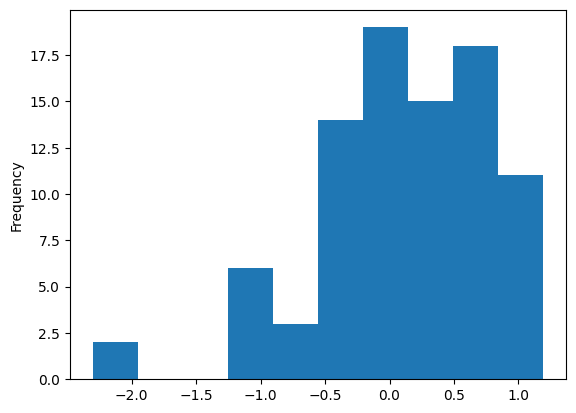

In [57]:
np.log(X_train['xGA_past_1']).plot(kind="hist")

In [58]:
# Train a model
# Import the RandomForestClassifier for classification
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Train the Random Forest model using the scaled training data
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.8181818181818182
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.67      0.40      0.50         5

    accuracy                           0.82        22
   macro avg       0.75      0.67      0.69        22
weighted avg       0.80      0.82      0.80        22



In [59]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f'XGBoost Accuracy: {accuracy_xgb}')
print(f'XGBoost Classification Report:\n{report_xgb}')


XGBoost Accuracy: 0.8636363636363636
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       1.00      0.40      0.57         5

    accuracy                           0.86        22
   macro avg       0.93      0.70      0.75        22
weighted avg       0.88      0.86      0.84        22



In [60]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print(f'Logistic Regression Accuracy: {accuracy_lr}')
print(f'Logistic Regression Classification Report:\n{report_lr}')


Logistic Regression Accuracy: 0.9545454545454546
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.80      0.89         5

    accuracy                           0.95        22
   macro avg       0.97      0.90      0.93        22
weighted avg       0.96      0.95      0.95        22



In [61]:
# Extract relevant columns from the test feature data
results = X_test[['Team', 'Season']]

# Add the predicted labels to the results DataFrame
results['Predicted_Label'] = y_pred

# Add the actual labels to the results DataFrame
results['Actual_Label'] = y_test

<ipython-input-61-24e052e4b896>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Predicted_Label'] = y_pred
<ipython-input-61-24e052e4b896>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Actual_Label'] = y_test


In [62]:
results

,Team,Season,Predicted_Label,Actual_Label
2,Arsenal,2021-01-01,0,0
17,Brighton,2019-01-01,0,0
44,Everton,2024-01-01,0,0
23,Burnley,2021-01-01,0,0
59,Liverpool,2020-01-01,0,1
26,Burnley,2024-01-01,0,0
96,Watford,2019-01-01,0,0
24,Burnley,2022-01-01,0,0
95,Tottenham Spurs,2024-01-01,0,1
70,Manchester United,2019-01-01,0,0


##Data Visualization  

<ipython-input-63-b460a684996c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  man_city_data_filtered['MonthYear'] = man_city_data_filtered['Date'].dt.to_period('M')


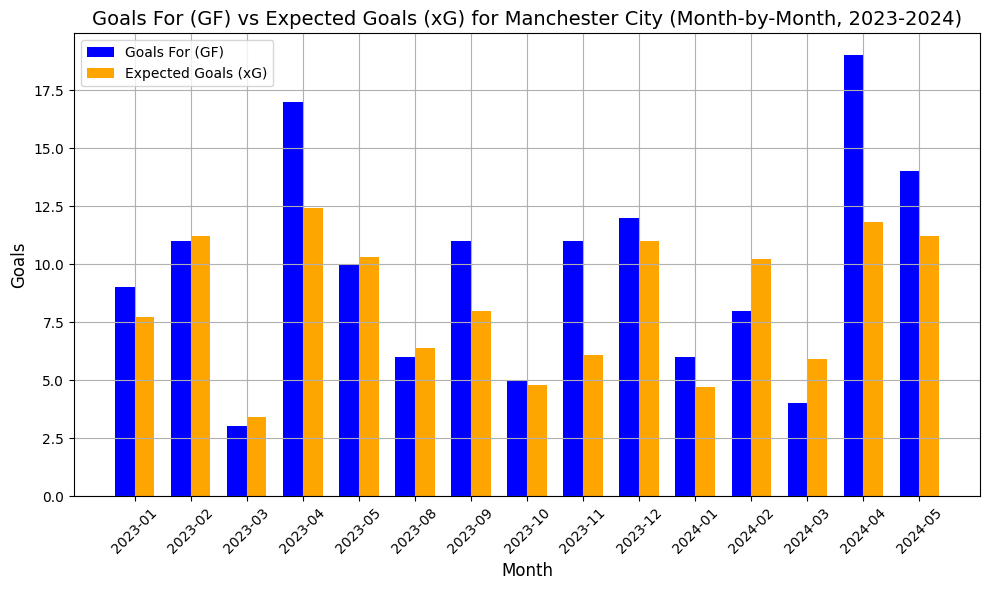

In [63]:
# Filter the dataset for the team "Manchester City"
man_city_data = football[football['Team'] == 'Manchester City']

# Filter the dataset for Manchester City and the years 2023 and 2024
man_city_data_filtered = man_city_data[man_city_data['Date'].dt.year.isin([2023, 2024])]

# Group the data month by month and calculate the sum of GF and xG per month
man_city_data_filtered['MonthYear'] = man_city_data_filtered['Date'].dt.to_period('M')

# Aggregate by month and year, summing up the GF and xG for each month
monthly_data = man_city_data_filtered.groupby('MonthYear').agg({'GF': 'sum', 'xG': 'sum'}).reset_index()

# Plot the updated bar chart with month-by-month data
plt.figure(figsize=(10,6))

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(monthly_data))

# Bar plot for Goals For (GF)
plt.bar(index, monthly_data['GF'], bar_width, label='Goals For (GF)', color='blue')

# Bar plot for Expected Goals (xG)
plt.bar(index + bar_width, monthly_data['xG'], bar_width, label='Expected Goals (xG)', color='orange')

# Adding labels and title
plt.title('Goals For (GF) vs Expected Goals (xG) for Manchester City (Month-by-Month, 2023-2024)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Goals', fontsize=12)

# Adding x-axis ticks with month-year format and rotating them for better visibility
plt.xticks(index + bar_width / 2, monthly_data['MonthYear'].astype(str), rotation=45)

# Adding legend and grid
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

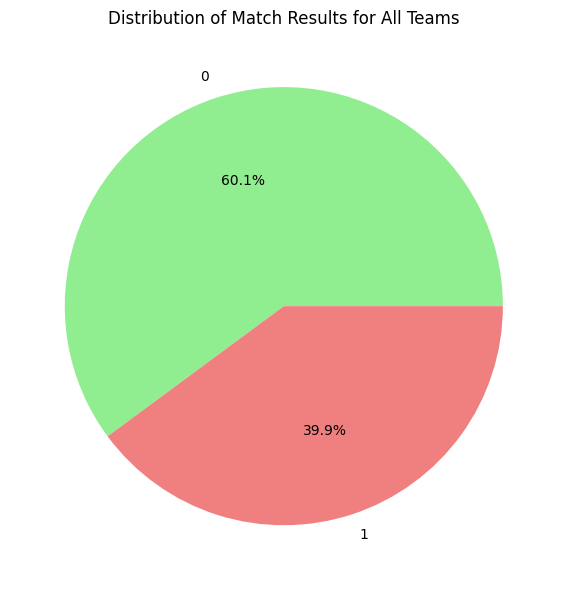

In [64]:
# Count the occurrences of each result for all teams
result_counts_all_teams = football['Result'].value_counts()

# Create the pie chart for all results
plt.figure(figsize=(6,6))
plt.pie(result_counts_all_teams, labels=result_counts_all_teams.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Match Results for All Teams')
plt.tight_layout()
plt.show()


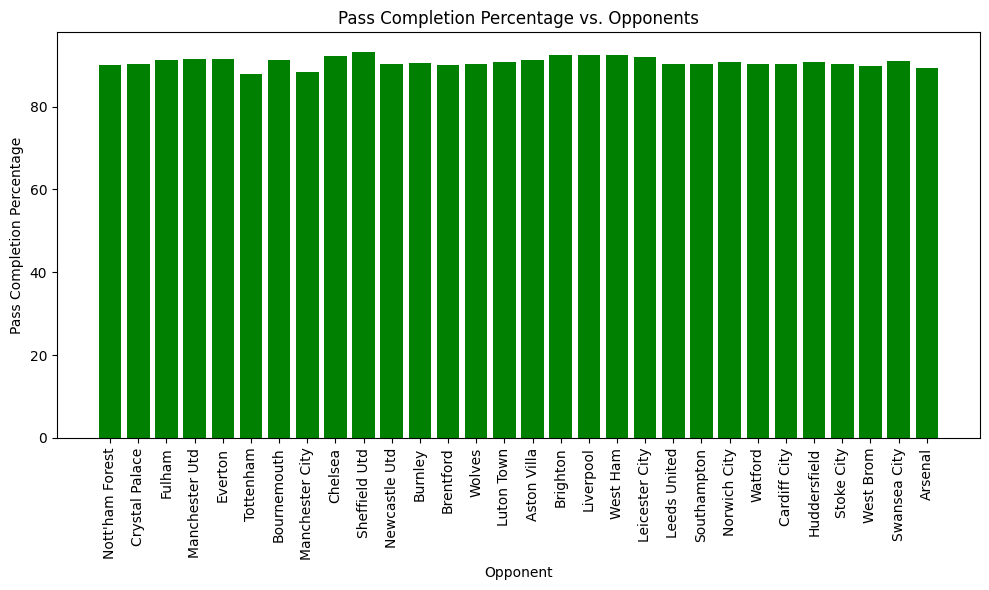

In [65]:
plt.figure(figsize=(10,6))
plt.bar(football['Opponent'], football['Cmp%'], color='green')
plt.title('Pass Completion Percentage vs. Opponents')
plt.xlabel('Opponent')
plt.ylabel('Pass Completion Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

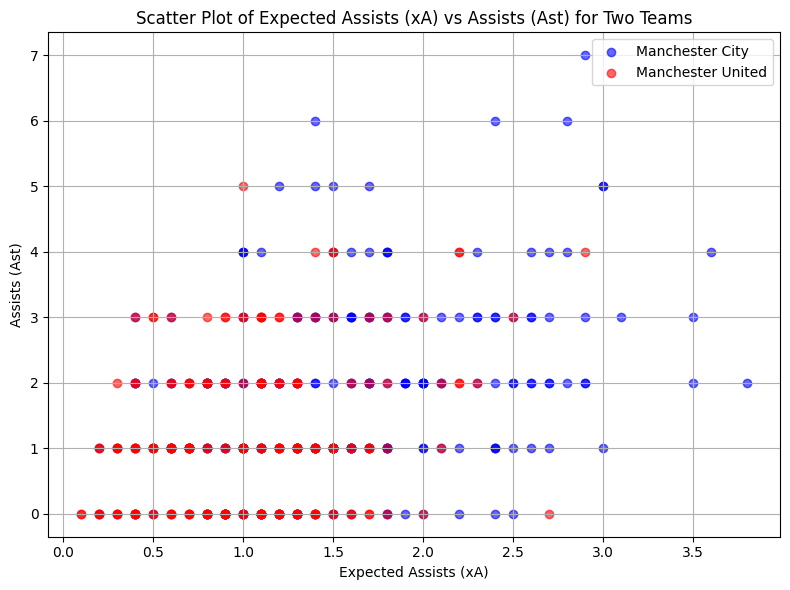

In [66]:
# Filter the dataset for two teams
team1_data = football[football['Team'] == 'Manchester City']
team2_data = football[football['Team'] == 'Manchester United']

# Create a scatter plot for the two teams
plt.figure(figsize=(8,6))

# Plot Team 1 (Manchester City)
plt.scatter(team1_data['xA'], team1_data['Ast'], color='blue', label='Manchester City', alpha=0.6)

# Plot Team 2 (Liverpool)
plt.scatter(team2_data['xA'], team2_data['Ast'], color='red', label='Manchester United', alpha=0.6)

# Add titles and labels
plt.title('Scatter Plot of Expected Assists (xA) vs Assists (Ast) for Two Teams')
plt.xlabel('Expected Assists (xA)')
plt.ylabel('Assists (Ast)')

# Add grid, legend, and show plot
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


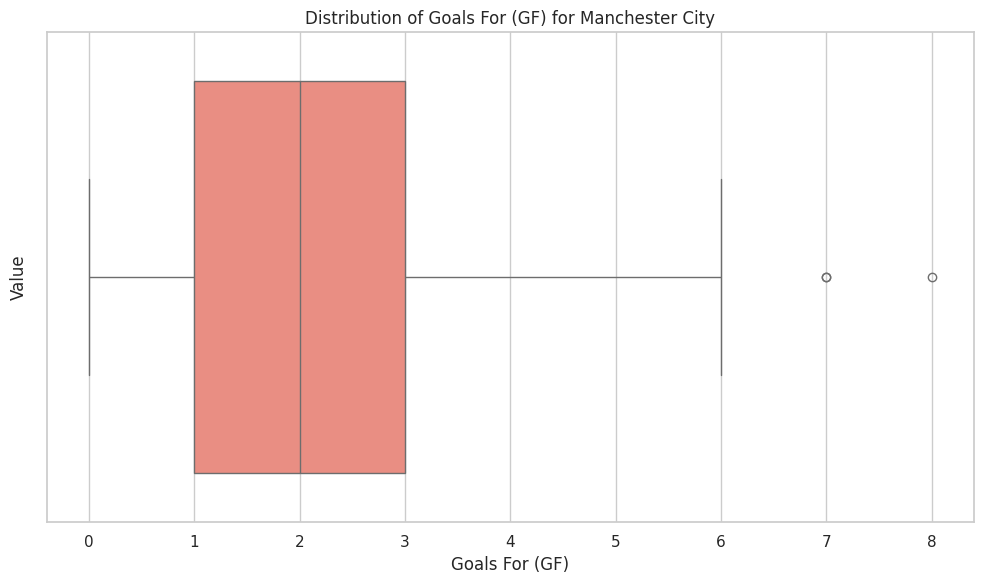

In [67]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Filter the dataset for Manchester City
man_city_data = football[football['Team'] == 'Manchester City']

# Choose the variable to plot, e.g., 'GF' (Goals For) for Manchester City
plt.figure(figsize=(10,6))

# Create the boxplot for Manchester City
sns.boxplot(data=man_city_data, x='GF', color='salmon')

# Add title and labels
plt.title('Distribution of Goals For (GF) for Manchester City')
plt.xlabel('Goals For (GF)')
plt.ylabel('Value')

# Show the plot
plt.tight_layout()
plt.show()

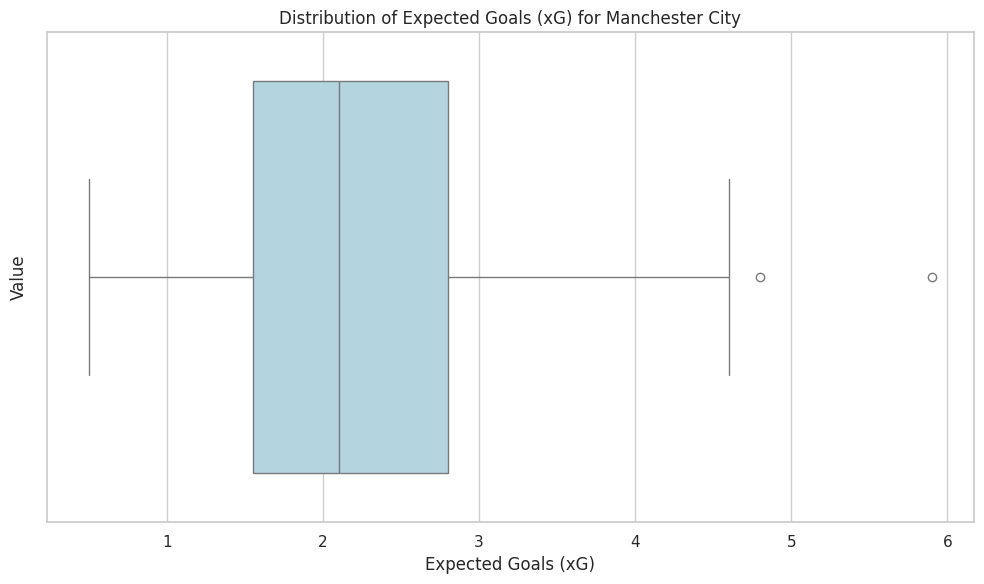

In [68]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Filter the dataset for Manchester City
man_city_data = football[football['Team'] == 'Manchester City']

# Box Plot for Expected Goals (xG)
plt.figure(figsize=(10,6))
sns.boxplot(data=man_city_data, x='xG', color='lightblue')
plt.title('Distribution of Expected Goals (xG) for Manchester City')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

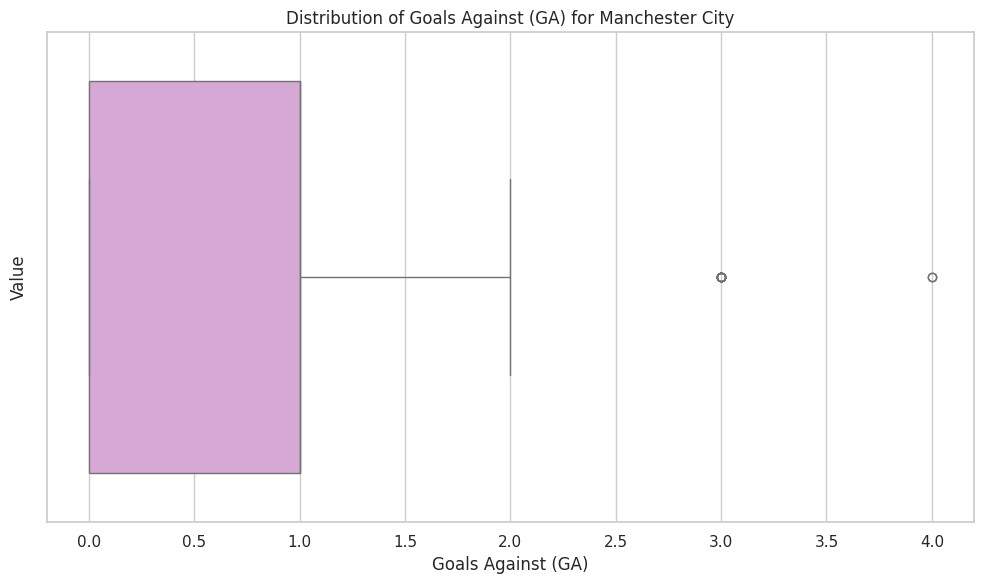

In [69]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Filter the dataset for Manchester City
man_city_data = football[football['Team'] == 'Manchester City']

# Box Plot for Goals Against (GA)
plt.figure(figsize=(10,6))
sns.boxplot(data=man_city_data, x='GA', color='plum')
plt.title('Distribution of Goals Against (GA) for Manchester City')
plt.xlabel('Goals Against (GA)')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

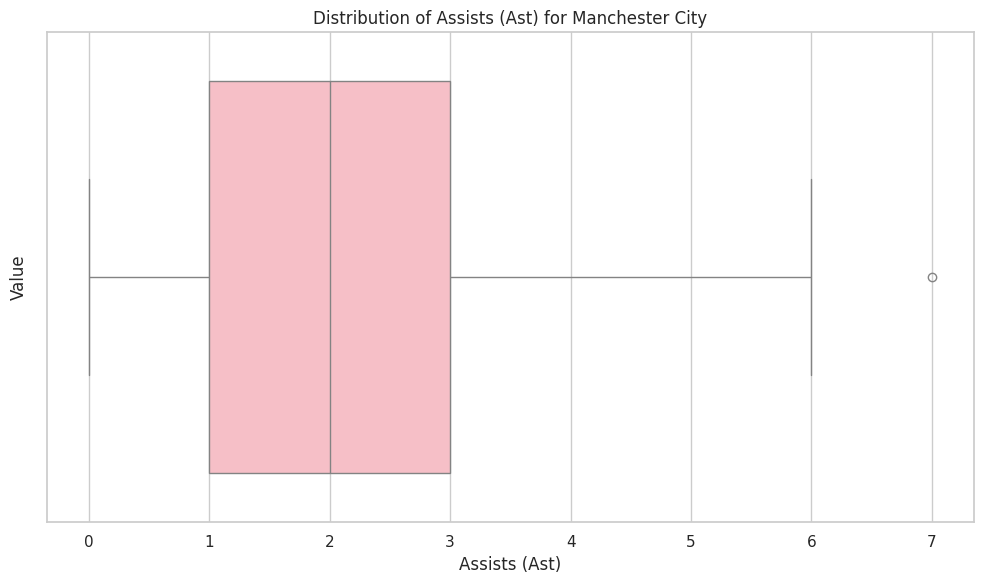

In [70]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Filter the dataset for Manchester City
man_city_data = football[football['Team'] == 'Manchester City']

# Box Plot for Assists (Ast)
plt.figure(figsize=(10,6))
sns.boxplot(data=man_city_data, x='Ast', color='lightpink')
plt.title('Distribution of Assists (Ast) for Manchester City')
plt.xlabel('Assists (Ast)')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

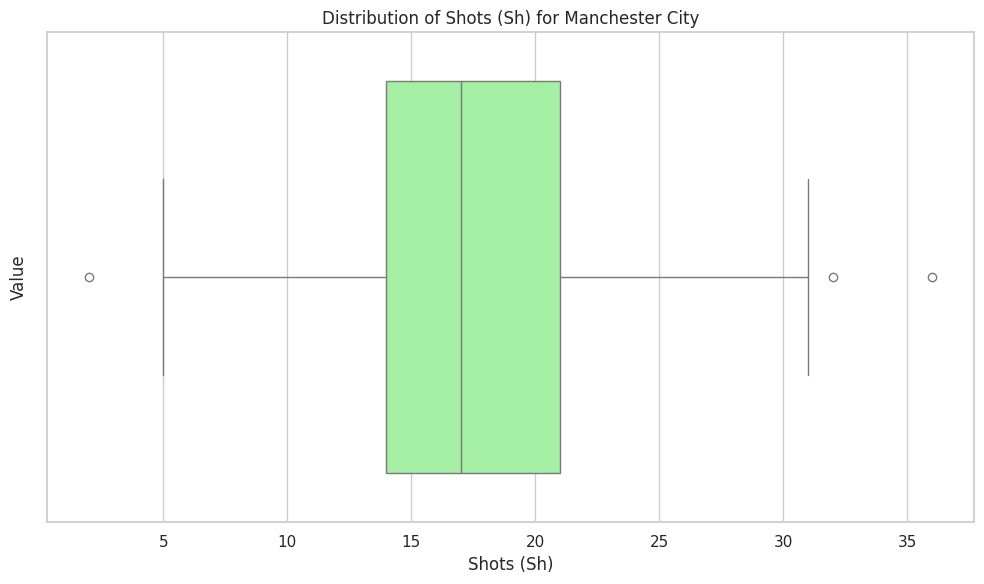

In [71]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Filter the dataset for Manchester City
man_city_data = football[football['Team'] == 'Manchester City']

# Box Plot for Shots (Sh)
plt.figure(figsize=(10,6))
sns.boxplot(data=man_city_data, x='Sh', color='palegreen')
plt.title('Distribution of Shots (Sh) for Manchester City')
plt.xlabel('Shots (Sh)')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

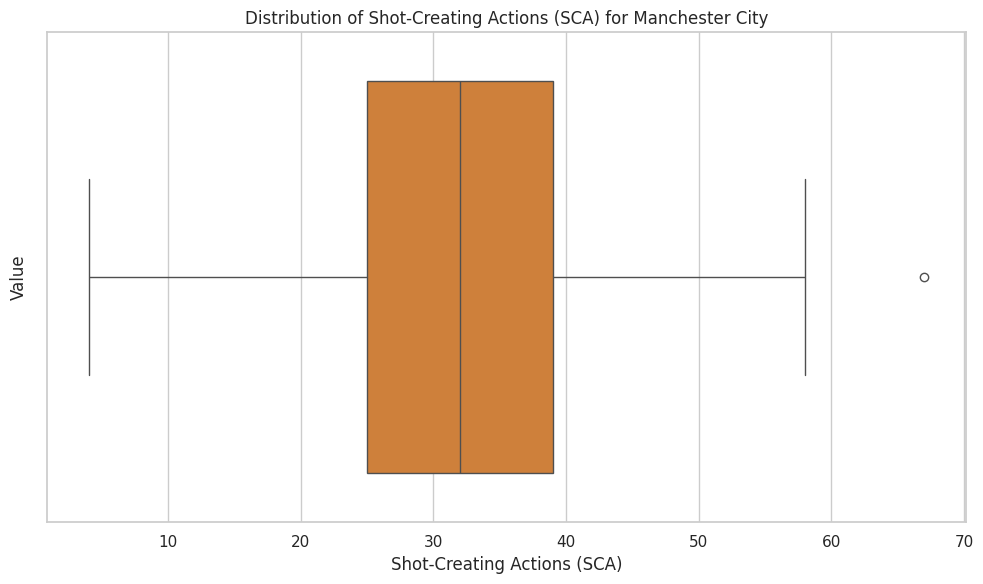

In [72]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Filter the dataset for Manchester City
man_city_data = football[football['Team'] == 'Manchester City']

# Box Plot for Shot-Creating Actions (SCA)
plt.figure(figsize=(10,6))
sns.boxplot(data=man_city_data, x='SCA', color='#e67e22')
plt.title('Distribution of Shot-Creating Actions (SCA) for Manchester City')
plt.xlabel('Shot-Creating Actions (SCA)')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

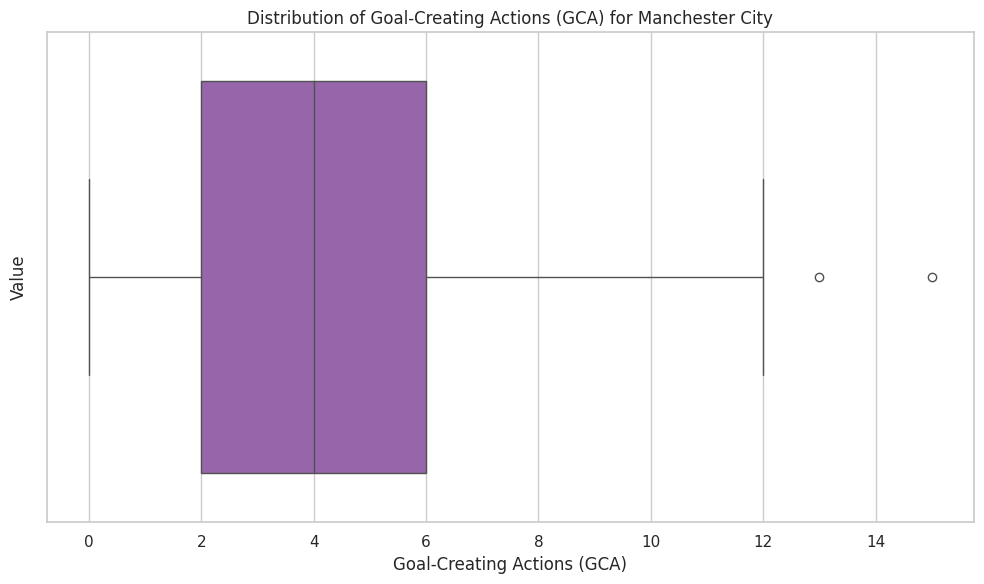

In [73]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Filter the dataset for Manchester City
man_city_data = football[football['Team'] == 'Manchester City']

# Box Plot for Goal-Creating Actions (GCA)
plt.figure(figsize=(10,6))
sns.boxplot(data=man_city_data, x='GCA', color='#9b59b6')
plt.title('Distribution of Goal-Creating Actions (GCA) for Manchester City')
plt.xlabel('Goal-Creating Actions (GCA)')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

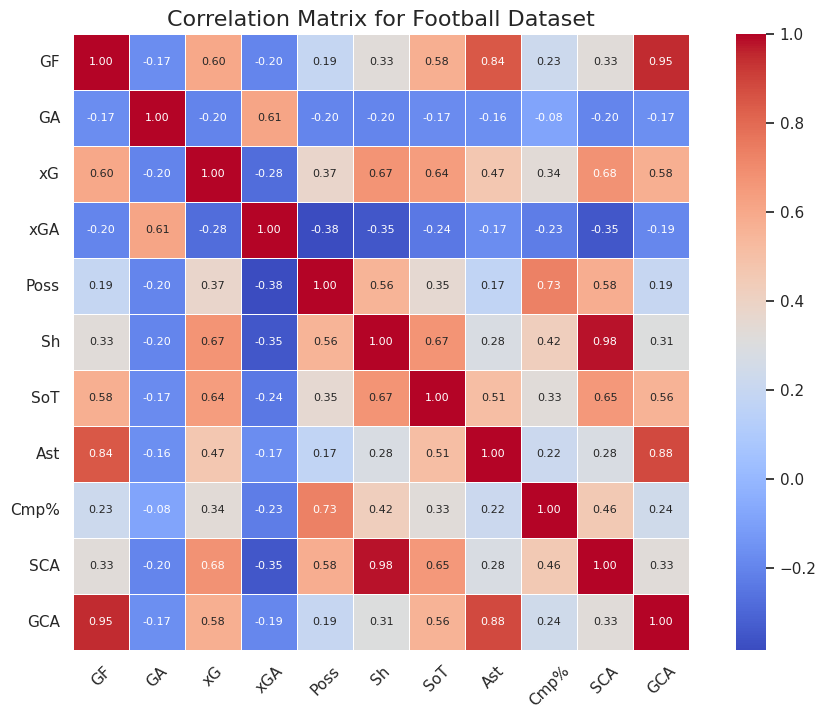

In [74]:
# focusing on performance metrics here is the correlation matrix
subset_cols = ['GF', 'GA', 'xG', 'xGA', 'Poss', 'Sh', 'SoT', 'Ast', 'Cmp%', 'SCA', 'GCA']

# Filter the correlation matrix for the selected columns
subset_corr_matrix = football[subset_cols].corr()

# Plot the heatmap for the subset
plt.figure(figsize=(12,8))  # Smaller figure size for fewer variables
sns.heatmap(subset_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5,square=True, annot_kws={"size": 8})
plt.title("Correlation Matrix for Football Dataset", size=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)
plt.show()

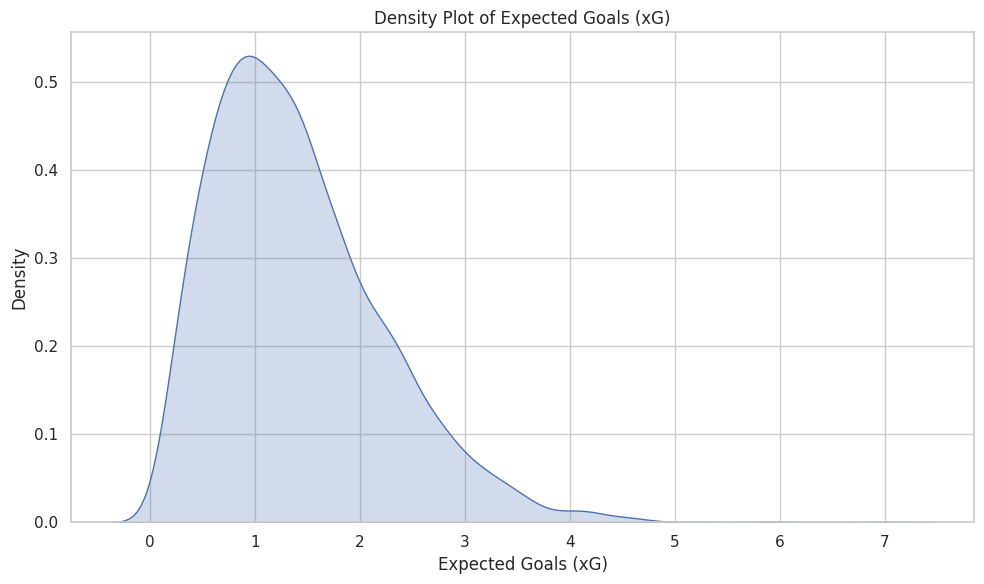

In [75]:
# Create a simple density plot for an important variable (e.g., 'xG')
plt.figure(figsize=(10,6))

# Create a density plot for 'xG' (Expected Goals) with the updated 'fill=True'
sns.kdeplot(football['xG'], fill=True)

# Set the title and labels
plt.title('Density Plot of Expected Goals (xG)')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Density')

# Display the plot
plt.tight_layout()
plt.show()